In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

### Unsupervised dimensionality reduction via PCA



Eigenvalues 
 [4.68272277 2.5174937  1.44251124 0.95025687 0.91388156 0.70002767
 0.59696802 0.09544816 0.14241154 0.31659155 0.22087117 0.26741076
 0.25909606]


<BarContainer object of 13 artists>

Text(0, 0.5, 'Explained Variance Ratio')

Text(0.5, 0, 'Principal Component Index')

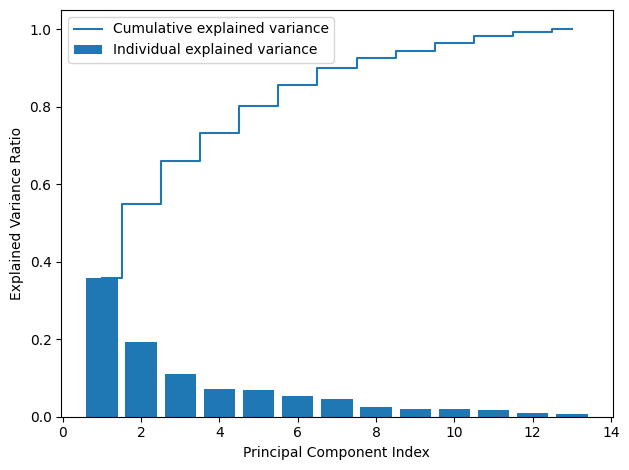

In [2]:
# We will start with 4 steps of PCA Algo
# 1. Standardize the data
# 2. Constructing the covariance matrix
# 3. Obtaining eigenvalues and eigenvectors of the covariance matrix
# 4. Sorting the eignevalues by decreasing order to rank the eigne vectors 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df_wine = pd.read_csv(
                'https://archive.ics.uci.edu/ml/'
                'machine-learning-databases/wine/wine.data',
                header=None
)

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# 1. Standardize the data
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# 2. Create a covariance matrix
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n', eigen_vals)
# A vector consisting of 13 eigen values and corresponding 13 x 13 eignen  vectors
# stored as column in 13 x 13 dimensional matrix (eigen_vecs_)

tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1, 14), var_exp, align='center', label='Individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### Feature transformation



In [3]:
eigen_vecs[:, 0]

array([ 0.15763477, -0.25237011, -0.01662626, -0.23514225,  0.14285062,
        0.38989121,  0.42596901, -0.28675917,  0.30864294, -0.08886736,
        0.30119689,  0.37783572,  0.28836287])

In [4]:
# 1. select k eigen vectors which corresponds to k largest eigen values
# 2. Construct a projection matrix 'W' from the top "k" eigen vectors
# 3. Transform the d dimensional X matrix with W to obtain new k-dimensional feature space.

# Make the list of (eigenvalues, eigenvectors)
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalues, eigenvectors) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

# A 13x2 dimensional matrxi from top 2 eigenpairs
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W: \n', w)

Matrix W: 
 [[ 0.15763477  0.49414675]
 [-0.25237011  0.1670862 ]
 [-0.01662626  0.33581955]
 [-0.23514225 -0.0230456 ]
 [ 0.14285062  0.2816766 ]
 [ 0.38989121  0.07164769]
 [ 0.42596901  0.00569565]
 [-0.28675917  0.04855187]
 [ 0.30864294  0.00589032]
 [-0.08886736  0.52633004]
 [ 0.30119689 -0.28399523]
 [ 0.37783572 -0.18136641]
 [ 0.28836287  0.3703045 ]]


array([2.18453092, 0.79011876])

Text(0.5, 0, 'PC 1')

Text(0, 0.5, 'PC 2')

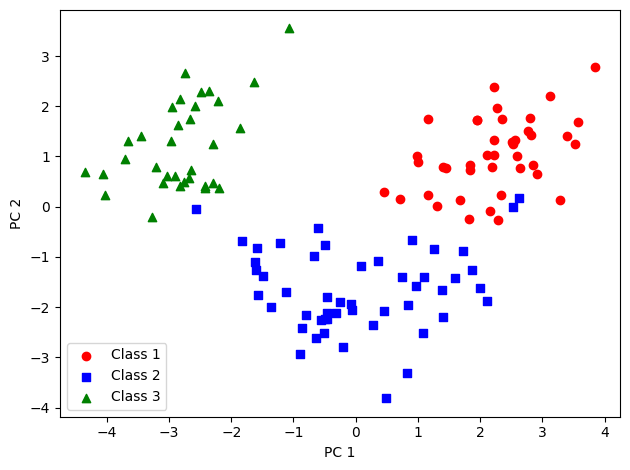

In [5]:
# Now we can transform the 2 dimensional
X_train_std[0].dot(w)
X_train_pca = X_train_std.dot(w)

# transform the 124 x 13 dimensional training dataset onto 2 PCA
# X` = XW

colors = ['r','b', 'g']
markers = ['o', 's', '^']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], 
                X_train_pca[y_train==l, 1],
                c=c, label=f'Class {l}', marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

#### Principal Component Analysis in scikit-learn

/Users/monusingh/work-share/code-practice-courses-books/machine-learning-python/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr', random_state=1)

Text(0.5, 0, 'PC 1')

Text(0, 0.5, 'PC 2')

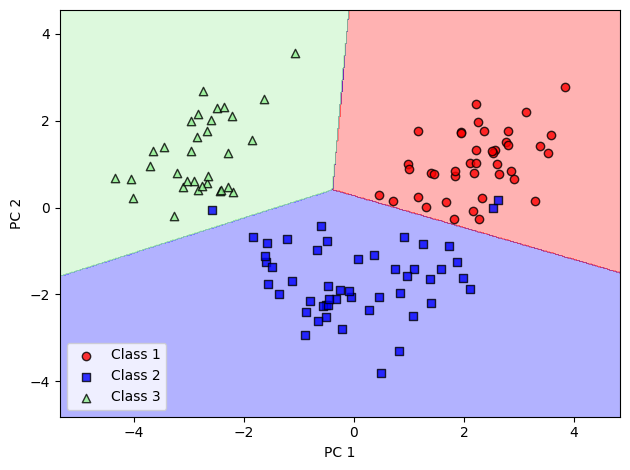

In [6]:
from plot_decision_regions_script import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')

# dimensionality reduction
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# fitting the logsitic regression model on the reduced dataset
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

#### Assessing feature contributions

Original feature contributions to a given principal component. These contributions are often called loadings



<BarContainer object of 13 artists>

Text(0, 0.5, 'Loadings for PC 1')

[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(6, 0, '7'),
 Text(7, 0, '8'),
 Text(8, 0, '9'),
 Text(9, 0, '10'),
 Text(10, 0, '11'),
 Text(11, 0, '12'),
 Text(12, 0, '13')]

(-1.0, 1.0)

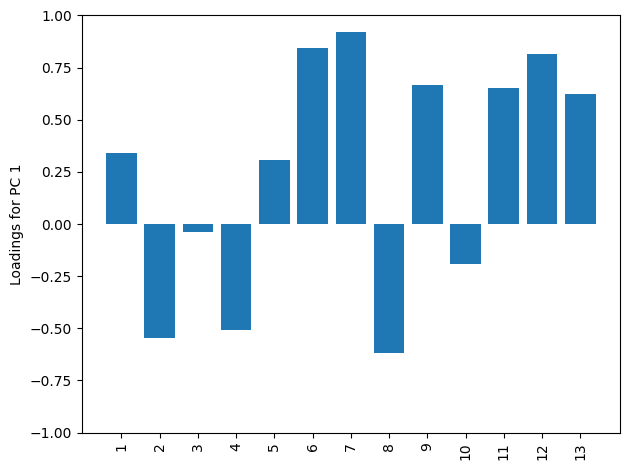

In [7]:
loadings = eigen_vecs * np.sqrt(eigen_vals)

fig, ax = plt.subplots()
ax.bar(range(13), loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:], rotation=90)
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

#### Supervised data compression via linear discriminant analysis


In [8]:
# Each mean vector store the mean feature value w.r.t. to example of class i
np.set_printoptions(precision=4)
mean_vec = []

for label in range(1, 4):
    mean_vec.append(np.mean(X_train_std[y_train==label], axis=0))
    print(f'MV {label}: {mean_vec[label - 1]}\n')

MV 1: [ 0.9585 -0.322   0.3219 -0.7607  0.4346  0.8574  0.9809 -0.4969  0.4261
  0.2418  0.4251  0.7139  1.1879]

MV 2: [-0.8829 -0.3073 -0.4875  0.2536 -0.323  -0.0632  0.0417 -0.0784  0.185
 -0.8575  0.4598  0.2946 -0.7075]

MV 3: [ 0.1468  0.8657  0.3387  0.5609 -0.0506 -0.9695 -1.282   0.7362 -0.8096
  0.9987 -1.2249 -1.3334 -0.4039]



In [9]:
# we can compute the within class scatter matrix 
# by calculating the individual scatter matrix for each indvidual class i 

d = 13
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vec):
    class_scatter = np.zeros((d, d))
    for row in X_train_std[y_train==label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter
print('Within - Class scatter matrix:'f'{S_W.shape[0]}x{S_W.shape[1]}')

Within - Class scatter matrix:13x13


In [15]:
# assumption is that class labels are in train data are uniformly distributed
print('class label distribution:', np.bincount(y_train)[1:])

# we can divide the scatter matrices with number of examples n_i
# it is same as calculating the covariance matrices
# (1 / ni) * (S_i) = (1/ni) * sum(x - mi)(x - mi).T

d = 13 # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vec):
    class_scatter = np.cov(X_train_std[y_train==label].T)
    S_W += class_scatter

print('Scaled within-class scatter matrix: ' f'{S_W.shape[0]}x{S_W.shape[1]}')

class label distribution: [41 50 33]
Scaled within-class scatter matrix: 13x13


In [16]:
# to calculate between class scatter matrix S_B:
# sum(ni(mi - m)(mi - m).T) for i 1 to C
# here m is the overall mean that is computed

mean_overall = np.mean(X_train_std, axis=0)
mean_overall = mean_overall.reshape(d, 1)

d = 13
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vec):
    n = X_train_std[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)  # make column vector
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('Between-class scatter matrix: ' f'{S_B.shape[0]}x{S_B.shape[1]}')


Between-class scatter matrix: 13x13


#### Selecting linear discriminanst for new feature subsapce

In [17]:
# generalized eigen value problem of matrix S_W^-1.S_B
eigen_vals, eigen_pairs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)
print('Eigen values in descending order: \n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])


Eigen values in descending order: 

418.49988288057745
204.5747764260585
6.570116523095358e-14
3.25621205809258e-14
3.25621205809258e-14
2.842170943040401e-14
2.5868126637200384e-14
1.7506408651447097e-14
1.7506408651447097e-14
8.510492331717003e-15
8.510492331717003e-15
2.772395926904462e-15
3.346224030681751e-17


<BarContainer object of 13 artists>

Text(0, 0.5, '"Discriminability" ratio')

Text(0.5, 0, 'Linear Discriminants')

(-0.1, 1.1)

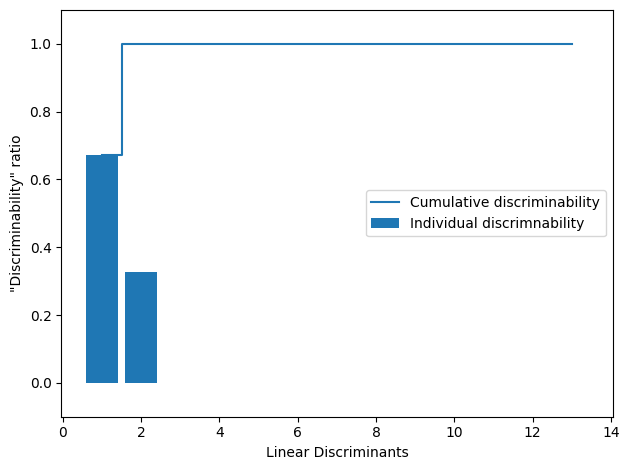

In [19]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

plt.bar(range(1, 14), discr, align='center', label='Individual discrimnability')
plt.step(range(1, 14), cum_discr, where='mid', label='Cumulative discriminability')

plt.ylabel('"Discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [24]:
W = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
               eigen_pairs[1][1][:, np.newaxis].real))

print('Matrix W: \n', W)

Matrix W: 
 [[ 0.1355  0.4941]
 [-0.0848  0.1671]
 [-0.6144  0.3358]
 [-0.622  -0.023 ]
 [-0.0874  0.2817]
 [-0.1803  0.0716]
 [-0.1288  0.0057]
 [-0.2229  0.0486]
 [-0.1693  0.0059]
 [ 0.1589  0.5263]
 [-0.1403 -0.284 ]
 [-0.1313 -0.1814]
 [ 0.1135  0.3703]]


#### Projecting examples onto the new feature space

Text(0.5, 0, 'LD 1')

Text(0, 0.5, 'LD 2')

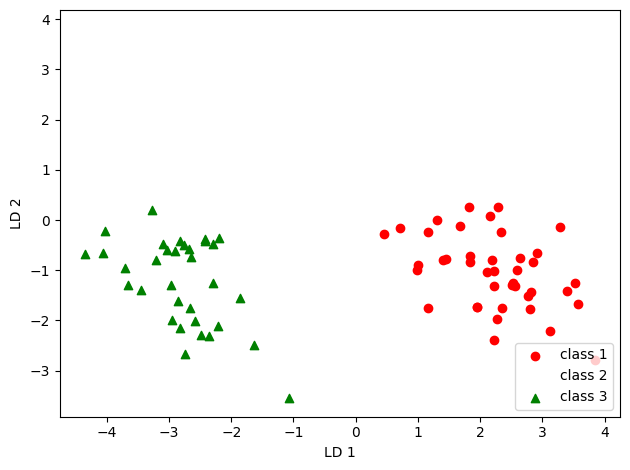

In [27]:
X_train_lda = X_train_std.dot(w)

colors = ['r', 'w', 'g']
markers = ['o', 's', '^']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train==l, 0],
                X_train_lda[y_train==l, 1] * (-1),
                c=c, label=f'class {l}', marker=m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

#### LDA via scikit-learn

/Users/monusingh/work-share/code-practice-courses-books/machine-learning-python/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Text(0.5, 0, 'LD 1')

Text(0, 0.5, 'LD 2')

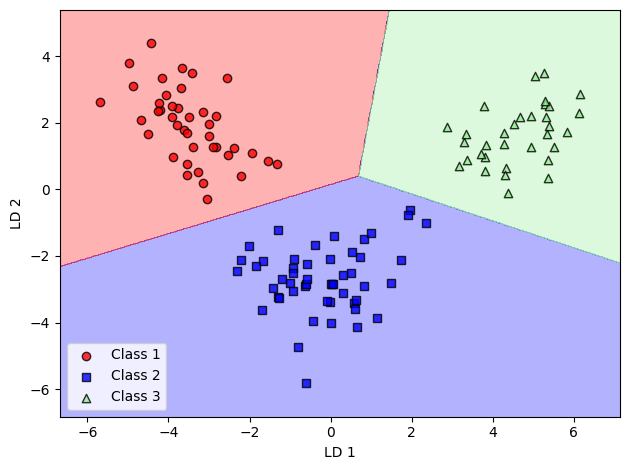

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

Text(0.5, 0, 'LD 1')

Text(0, 0.5, 'LD 2')

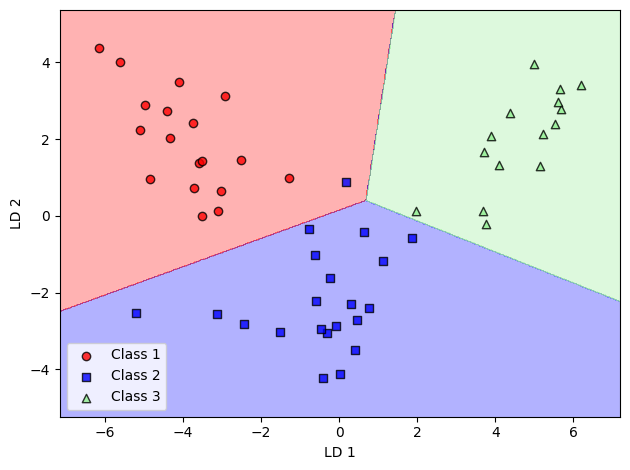

In [29]:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

### t-SNE : t-distributed stochastic neighbor embedding

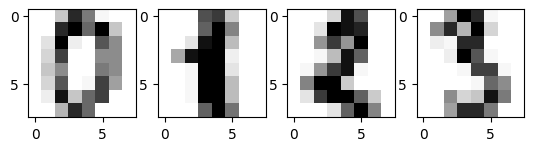

In [35]:
# 1. modelling data points based on thier pairwise distance in orig feature space
# 2. then find probability dist. of pairwise distance in this space
# 3. which is close approximation of probability dist. of pairwise distance
# 4. It is a technique reuired for visualization purpose require whole dataset
# 5. It projects points directly - does not involve projection matrix.
# --------------

from sklearn.datasets import load_digits
digits = load_digits()

# 8x8 grayscale images.
fig, ax = plt.subplots(1, 4)
for i in range(4):
    ax[i].imshow(digits.images[i], cmap='Greys')
plt.show()


In [37]:
# digits.data lets us access tabular version of this dataset
digits.data.shape

y_digits = digits.target
X_digits = digits.data

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca', random_state=123)
# projects the 64 dimensionsal dataset to 2-dimensional sapce.
# init = 'pca' which initializes tsne embedding using pca

X_digits_tsne = tsne.fit_transform(X_digits)

(1797, 64)